# Evaluación Final MOD3 - Mar Pastor
---

### Ejercicio EDA y Vizualización de datos

En este ejercicio usaremos datos que consisten en dos BBDD de tipo CSV que contienen datos que describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea.

Exploraremos los archivos:

- `Customer Flight Activity.csv` que contiene información sobre la actividad de vuelo de los clientes
- `Customer Loyalty History.csv` que proporciona un perfil detallado de los clientes y detalles sobre su membresía en el programa de lealtad
---

In [14]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# ------------------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [ ]:
# abrimos los DataFrames:

df_flight = pd.read_csv('../data/Customer Flight Activity.csv')
df_loyalty = pd.read_csv('../data/Customer Loyalty History.csv')

### Trabajamos con el DataFrame de información sobre la actividad de vuelo de los clientes
#### DataFrame: `df_flight`
---

In [ ]:
# 1. Exploramos una visión general de cada uno de los DataFrame:

display(df_flight.head(2)) # revisamos los primeros datos
print('---' * 50)
display(df_flight.tail(2)) # revisamos los últimos datos
print('---' * 50)
display(df_flight.sample(2)) # revisamos datos aleatorios

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


------------------------------------------------------------------------------------------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


------------------------------------------------------------------------------------------------------------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
78924,702327,2017,5,6,3,9,3276,327.0,0,0
289049,193781,2018,6,0,0,0,0,0.0,0,0


In [ ]:
# exploramos el número de filas y columnas:
 
print(f"El número de filas es {df_flight.shape[0]}, el número de columnas es {df_flight.shape[1]}")

El número de filas es 405624, el número de columnas es 10


In [ ]:
# exploramos los nombres de las columnas:

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [ ]:
# 2. Exploramos la información de las columnas:

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


### Primeras conclusiones de la epxloración de datos del DataFrame:

- No existen datos nulos, por lo que no haremos ninguna modificación
- Las columnas tienen nombres unificados, por lo que haremos cambios
- La columna 'Points Accumulated' tiene un tipo de dato 'float' y luego de la exploración inicial podríamos unificar los datos y cambiarlo a 'entero'
- La columna 'Year' la convertimos en object para tratarla como una columna categórica

In [ ]:
# convertir dato 'float' a 'int' en la columna 'Points Accumulated'

df_flight['Points Accumulated'] = df_flight['Points Accumulated'].astype(int)

df_flight.info() # para comprobar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Loyalty Number               405624 non-null  int64
 1   Year                         405624 non-null  int64
 2   Month                        405624 non-null  int64
 3   Flights Booked               405624 non-null  int64
 4   Flights with Companions      405624 non-null  int64
 5   Total Flights                405624 non-null  int64
 6   Distance                     405624 non-null  int64
 7   Points Accumulated           405624 non-null  int32
 8   Points Redeemed              405624 non-null  int64
 9   Dollar Cost Points Redeemed  405624 non-null  int64
dtypes: int32(1), int64(9)
memory usage: 29.4 MB


In [ ]:
# convertir dato 'int' a 'object' en la columna 'Year'

df_flight['Year'] = df_flight['Year'].astype('object')

df_flight.info() # para verificar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Loyalty Number               405624 non-null  int64 
 1   Year                         405624 non-null  object
 2   Month                        405624 non-null  int64 
 3   Flights Booked               405624 non-null  int64 
 4   Flights with Companions      405624 non-null  int64 
 5   Total Flights                405624 non-null  int64 
 6   Distance                     405624 non-null  int64 
 7   Points Accumulated           405624 non-null  int32 
 8   Points Redeemed              405624 non-null  int64 
 9   Dollar Cost Points Redeemed  405624 non-null  int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 29.4+ MB


In [39]:
# convertir dato 'int' a 'object' en la columna 'Month'

df_flight['Month'] = df_flight['Month'].astype('object')

df_flight.info() # para verificar el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Loyalty Number               405624 non-null  int64 
 1   Year                         405624 non-null  object
 2   Month                        405624 non-null  object
 3   Flights Booked               405624 non-null  int64 
 4   Flights with Companions      405624 non-null  int64 
 5   Total Flights                405624 non-null  int64 
 6   Distance                     405624 non-null  int64 
 7   Points Accumulated           405624 non-null  int32 
 8   Points Redeemed              405624 non-null  int64 
 9   Dollar Cost Points Redeemed  405624 non-null  int64 
dtypes: int32(1), int64(7), object(2)
memory usage: 29.4+ MB


In [40]:
# 3. Exploramos los datos de las columnas categóricas usando 'describe()'

df_flight.describe(include='O').T

,count,unique,top,freq
Year,405624,2,2017,202812
Month,405624,12,1,33802


In [ ]:
# exploramos los datos de las columnas categoricas usando describe()

df_flight.describe().T

# concluímos que las media y la mediana no están cercanas en muchos de los datos de algunas columnas, 
# y en algunas columnas la dispersión de los datos es alta

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.667002,146.579083,0.0,0.00,50.0,239.00,676.0
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [ ]:
# 4. Análisis la variable categóricas, usando un 'value_count'

for col in df_flight.select_dtypes(include='O').columns:
    print(f"Columna --> {col}")
    print(f"{df_flight[col].value_counts()}")

# los años 2017 y 2018 aparecen la misma cantidad de veces en la columna 'Year'

Columna --> Year
Year
2017    202812
2018    202812
Name: count, dtype: int64


In [37]:
# Análisis de la variable numéricas, usando histograma y boxplot
# seleccionamos las columnas que nos interesan

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

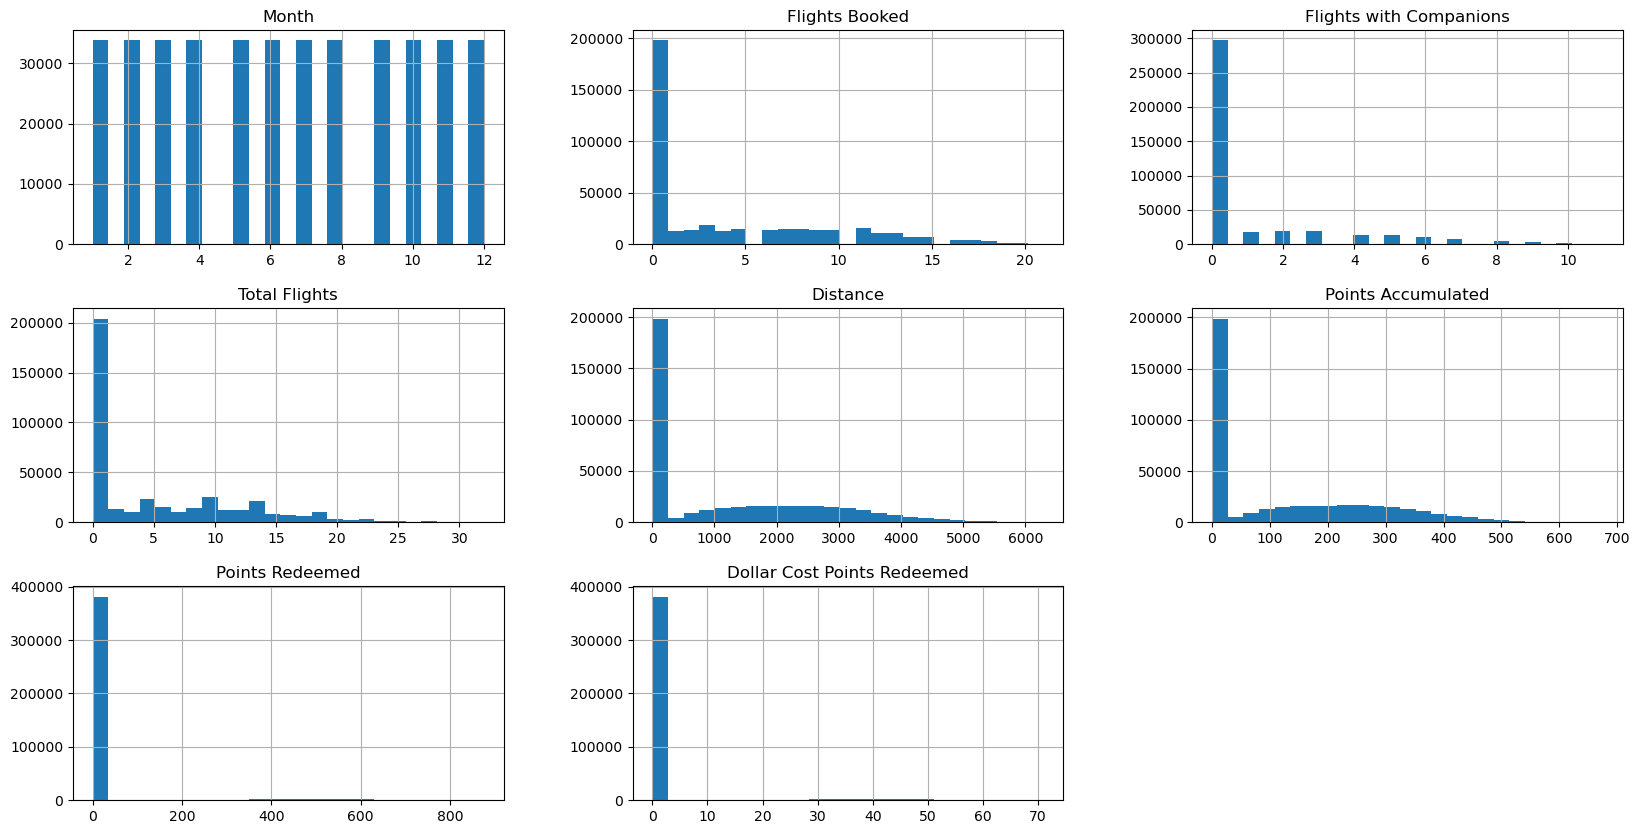

In [38]:
df_flight[['Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']].hist(bins=25, figsize=(20,10));

In [25]:
# valores nulos 'Salary', 'Cancellation Year, 'Cancellation Month'
# cambio valores a int 'Salary', 'Cancellation Year, 'Cancellation Month'